In [1]:
# http://savvastjortjoglou.com/nba-shot-sharts.html
# Also used nba_py as an API access
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nba_py.shotchart import ShotChart
from nba_py import game
import requests_cache


In [51]:
appended_data = []
summary = game.BoxscoreSummary(game_id='0021600013').game_summary()
foo = game.BoxscoreSummary(game_id='0021600013').line_score()
homeTeam = summary['HOME_TEAM_ID']
awayTeam = summary['VISITOR_TEAM_ID']

ids = game.Boxscore(game_id='0021600013').player_stats()['PLAYER_ID']
for an_id in ids:
    shot_df = ShotChart(player_id=an_id, game_id = '0021600013')
    shot_df = shot_df.shot_chart()
    appended_data.append(shot_df)
    
    
shot_df = pd.concat(appended_data, axis=0)
print(shot_df)



            GRID_TYPE     GAME_ID GAME_EVENT_ID PLAYER_ID      PLAYER_NAME  \
0   Shot Chart Detail  0021600013             7      2772     Trevor Ariza   
1   Shot Chart Detail  0021600013           214      2772     Trevor Ariza   
2   Shot Chart Detail  0021600013           225      2772     Trevor Ariza   
3   Shot Chart Detail  0021600013           241      2772     Trevor Ariza   
4   Shot Chart Detail  0021600013           362      2772     Trevor Ariza   
5   Shot Chart Detail  0021600013           317      2772     Trevor Ariza   
6   Shot Chart Detail  0021600013           450      2772     Trevor Ariza   
7   Shot Chart Detail  0021600013           557      2772     Trevor Ariza   
0   Shot Chart Detail  0021600013             2    201583    Ryan Anderson   
1   Shot Chart Detail  0021600013            18    201583    Ryan Anderson   
2   Shot Chart Detail  0021600013            94    201583    Ryan Anderson   
3   Shot Chart Detail  0021600013           184    201583    Rya

In [104]:
print (shot_df[['LOC_X', 'LOC_Y']].where(shot_df['TEAM_ID'] == int(homeTeam)))


   LOC_X LOC_Y
0    NaN   NaN
1    NaN   NaN
2    NaN   NaN
3    NaN   NaN
4    NaN   NaN
5    NaN   NaN
6    NaN   NaN
7    NaN   NaN
0    NaN   NaN
1    NaN   NaN
2    NaN   NaN
3    NaN   NaN
4    NaN   NaN
5    NaN   NaN
6    NaN   NaN
7    NaN   NaN
8    NaN   NaN
9    NaN   NaN
10   NaN   NaN
11   NaN   NaN
12   NaN   NaN
13   NaN   NaN
14   NaN   NaN
0    NaN   NaN
1    NaN   NaN
2    NaN   NaN
3    NaN   NaN
4    NaN   NaN
5    NaN   NaN
6    NaN   NaN
..   ...   ...
1     99   238
2    111   121
3      5    16
4    111   183
5     58   169
0   -238   -20
1    138   -10
2      5    21
3     14     6
4      5    13
5    -13    80
6     36   256
7      8    31
8   -127    41
9     -3    21
10  -137   253
11     4    22
0     34    13
1      5     8
2    -88   540
3      0     1
4     42   197
0      0     1
1    119     1
0   -181   212
1    145   214
2   -147   238
3   -111   258
4    -52    36
0    125   217

[173 rows x 2 columns]


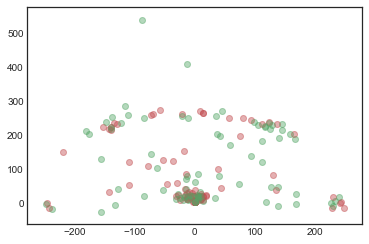

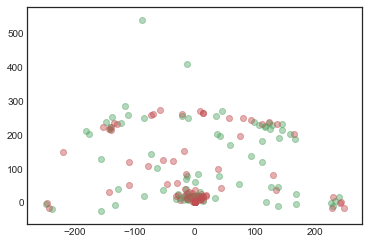

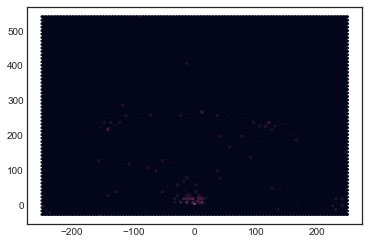

In [113]:
import numpy as np
a = .25
b = .25
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(homeTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(homeTeam)), c='g', alpha=a)
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(awayTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(awayTeam)), c='r',alpha=a)
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(awayTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(awayTeam)), c='r',alpha=b)
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(homeTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(homeTeam)), c='g', alpha=b)

plt.show()
plt.figure()
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(awayTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(awayTeam)), c='r',alpha=a)
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(homeTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(homeTeam)), c='g', alpha=a)
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(homeTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(homeTeam)), c='g', alpha=b)
plt.scatter(shot_df.LOC_X.where(shot_df['TEAM_ID'] == int(awayTeam)), shot_df.LOC_Y.where(shot_df['TEAM_ID'] == int(awayTeam)), c='r',alpha=b)
plt.show()
plt.figure()
plt.hexbin(shot_df.LOC_X, shot_df.LOC_Y)

plt.show()

In [49]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

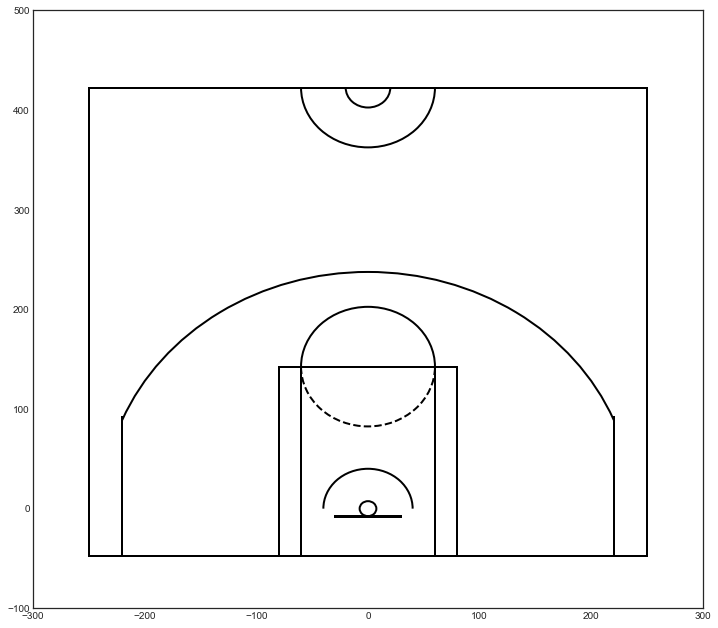

In [59]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

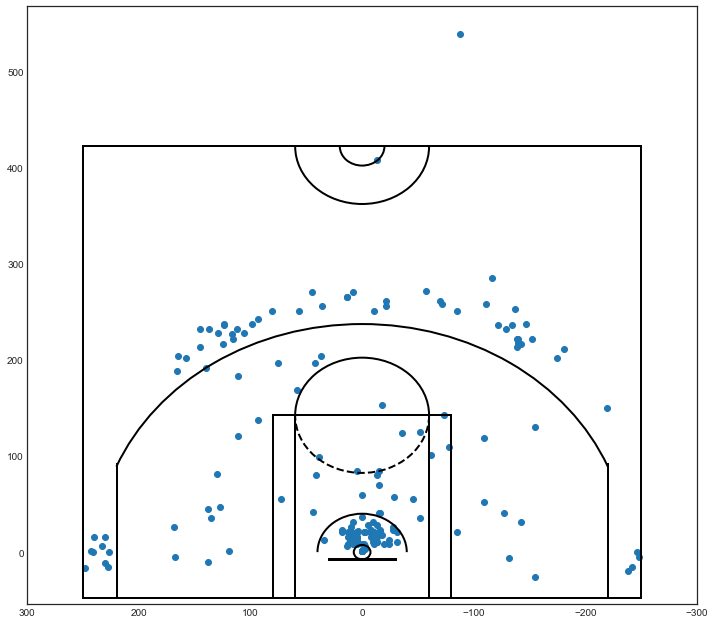

In [60]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

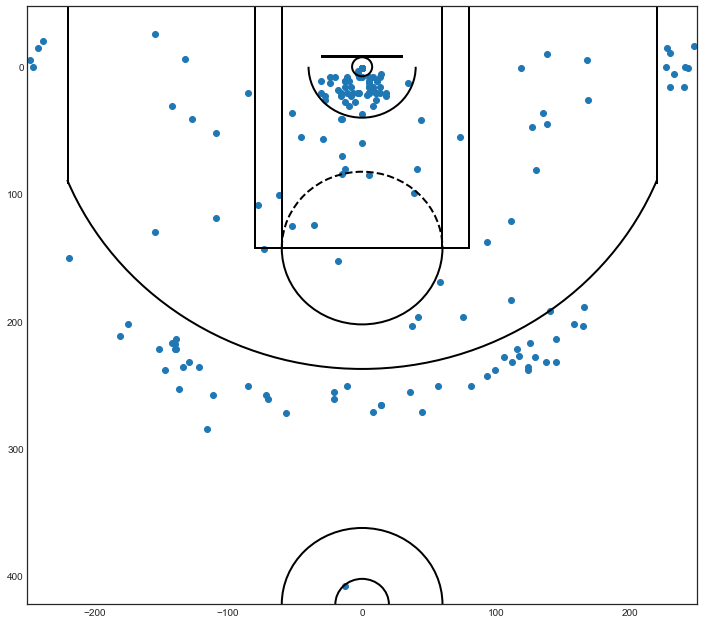

In [61]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()